In [2]:
from nltk.util import ngrams

In [3]:
text = """
Query intent prediction is a component of information retrieval which improves 
result relevance through an understanding of latent user intents in addition to 
explicit query keywords. We target context-of-use intents, such as the activity 
for which a product is used and the target audience for a product, 
which are subjective and not usually indexed as product attributes in the catalog. 
These aspects are often subjective and are commonly not indexed as part of the product catalog. 
To predict latent query intents, we extract intents from product reviews on amazon.com and, 
using behavioral purchase signals that associate queries with the reviewed products, 
train query classifiers that label queries with the intents extracted from reviews.
"""

In [4]:
from nltk.corpus import stopwords 

In [5]:
tokenized = text.split()

In [6]:
test_ngram = ngrams(tokenized, 2)

In [7]:
for item in test_ngram:
    print(item)

('Query', 'intent')
('intent', 'prediction')
('prediction', 'is')
('is', 'a')
('a', 'component')
('component', 'of')
('of', 'information')
('information', 'retrieval')
('retrieval', 'which')
('which', 'improves')
('improves', 'result')
('result', 'relevance')
('relevance', 'through')
('through', 'an')
('an', 'understanding')
('understanding', 'of')
('of', 'latent')
('latent', 'user')
('user', 'intents')
('intents', 'in')
('in', 'addition')
('addition', 'to')
('to', 'explicit')
('explicit', 'query')
('query', 'keywords.')
('keywords.', 'We')
('We', 'target')
('target', 'context-of-use')
('context-of-use', 'intents,')
('intents,', 'such')
('such', 'as')
('as', 'the')
('the', 'activity')
('activity', 'for')
('for', 'which')
('which', 'a')
('a', 'product')
('product', 'is')
('is', 'used')
('used', 'and')
('and', 'the')
('the', 'target')
('target', 'audience')
('audience', 'for')
('for', 'a')
('a', 'product,')
('product,', 'which')
('which', 'are')
('are', 'subjective')
('subjective', 'and'

In [8]:
from collections import Counter
from itertools import chain, groupby, product

In [9]:
import time

In [10]:
t0 = time.time()
c1 = Counter(list(test_ngram))
t1 = time.time()
print(t1-t0)

0.0005526542663574219


In [11]:
t0 = time.time()
c1 = Counter(chain.from_iterable(test_ngram))
t1 = time.time()
print(t1-t0)

0.0002765655517578125


In [12]:
import numpy as np
import os
import pandas as pd
import vsm

In [13]:
DATA_HOME = os.path.join('/data/daisyxu/data/vsmdata')

In [14]:
giga5 = pd.read_csv(
    os.path.join(DATA_HOME, 'giga_window5-scaled.csv.gz'), index_col=0)

In [15]:
giga5_pmi = vsm.pmi(giga5, positive = False)

In [16]:
giga5_pmi.iloc[20:50,20:50]

,abstract,abu,abundance,abuse,accelerate,accept,accepted,access,accident,accommodation,...,achieve,acknowledge,acknowledged,acoustic,acquire,acquit,acre,across,acrylic,act
abstract,10.990437,0.000000,2.971699,0.000000,0.000000,-1.099606,-1.041654,-3.021484,-0.626235,0.000000,...,-0.863002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.552052,3.749748,-1.537781
abu,0.000000,8.998613,0.000000,2.690334,-2.713117,-0.429573,-0.409662,-2.505932,-2.187890,0.000000,...,-2.355665,-0.920845,-0.012979,0.000000,-1.377825,0.000000,-1.575536,-1.757527,0.000000,-1.511424
abundance,2.971699,0.000000,11.403026,0.000000,0.000000,-2.009108,0.000000,-0.398111,0.000000,0.000000,...,-1.389512,0.872802,-1.952634,0.000000,0.000000,0.000000,-0.504023,-0.782254,0.000000,-0.621174
abuse,0.000000,2.690334,0.000000,8.459823,-3.102887,-0.756139,-0.881568,-1.259773,-2.992095,0.000000,...,-4.172552,0.318240,0.108513,0.000000,0.000000,0.000000,-1.859946,-1.317559,0.000000,0.821856
accelerate,0.000000,-2.713117,0.000000,-3.102887,10.246939,0.000000,-2.338500,0.118421,-1.379466,0.720409,...,-0.097214,0.000000,-1.965285,0.000000,-0.072223,0.000000,0.000000,-0.460955,0.000000,-1.319854
accept,-1.099606,-0.429573,-2.009108,-0.756139,0.000000,8.218327,-0.706328,-1.604945,-0.954936,0.267912,...,-1.084889,0.579261,-2.132119,0.000000,-2.450524,0.000000,-2.986093,-2.565614,0.000000,-0.959061
accepted,-1.041654,-0.409662,0.000000,-0.881568,-2.338500,-0.706328,8.581065,-2.791457,-0.849895,-0.150612,...,-1.876688,-0.716854,0.205022,-1.659077,-2.378329,0.111896,0.000000,-1.354348,0.000000,-1.316167
access,-3.021484,-2.505932,-0.398111,-1.259773,0.118421,-1.604945,-2.791457,7.759477,-2.032070,0.167369,...,-0.449333,-1.649774,-1.716608,-2.617256,-0.271250,0.000000,-0.983526,-0.605405,0.000000,0.147929
accident,-0.626235,-2.187890,0.000000,-2.992095,-1.379466,-0.954936,-0.849895,-2.032070,8.394620,0.000000,...,-3.539711,-2.635520,-0.741069,0.000000,-2.198477,0.000000,-2.782055,-1.368140,0.000000,-0.676620
accommodation,0.000000,0.000000,0.000000,0.000000,0.720409,0.267912,-0.150612,0.167369,0.000000,11.244823,...,0.449253,-0.908319,-1.030160,0.000000,0.000000,0.000000,0.000000,-0.775303,0.000000,0.250007


In [17]:
giga5_pmi_value = giga5_pmi.values.flatten()

In [18]:
import matplotlib.pyplot as plt

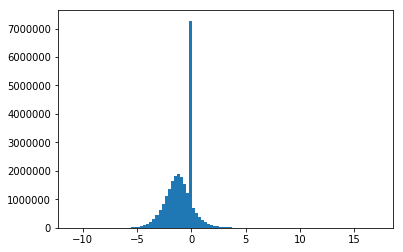

In [19]:
plt.hist(giga5_pmi_value, bins = 100)
plt.show()

In [20]:
giga5_pmi.loc['act','abu']

-1.5114240032376762